<a href="https://colab.research.google.com/github/HEMEX-Team/pid/blob/main/yaraJun7th_Interview_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt

url = '/content/df_kinematic_branch_data_ayae27th.csv'

# df = pd.read_excel(url, usecols=range(1, 937))
df = pd.read_csv(url, delimiter='\t')
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,398,399,400,401,402,403,404,405,406,407
0,[0.3705411 0.30427825 0.2161966 ... 0.682615...,[],[2],[0],[ 523 524 ...,[2],[0],[],[2],[0],...,[],[],[],[],[],[],[],[8.000723 7.533669 4.161247 3.7596526 3.693...,[1.8759719 1.5220069],[1.5220069]
1,[0.56577563 0.20581116 0.55304945 ... 0.380033...,[],[2],[0],[],[2],[0],[],[2],[0],...,[],[],[],[],[],[],[],[9.491779 4.9686785 4.080696 3.6155927 3.377...,[5.010314 1.1508262 1.9405949 1.1010212 0.966...,[5.010314]
2,[0.28236777 0.27123296 0.3003292 0.78045803 0...,[],[2],[0],[],[2],[0],[],[2],[0],...,[],[],[],[],[],[],[],[],[],[]


In [ ]:

# inlineFn stringidief_arr -> npArr
df = df.applymap(
    lambda x: np.fromstring(x.strip("[]"), sep=' ') if isinstance(x, str) else x
)
df.head()



In [ ]:
#@title Flatten
df_new=df.copy()

# Flatten
for col in df_new.columns:
  for i in df_new.index:
    x=df_new.at[i,col]
    # if npNdarr => flatten(), # flatten: mean, std, len
    if isinstance(x, np.ndarray):
      df_new.at[i, col] = (np.mean(x), np.std(x), len(x))
df_new.head()


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


,0,1,2,3,4,5,6,7,8,9,...,926,927,928,929,930,931,932,933,934,935
0,0,0,"(nan, nan, 0)",True,14.897637,"(nan, nan, 0)",True,"(nan, nan, 0)","(-inf, nan, 69)","(nan, nan, 0)",...,"(4.9981964125, 1.5078420801208405, 24)","(0.27482645125000005, 1.315101414607128, 24)","(0.03384846666666669, 1.8030001641526359, 24)","(0.0, 0.0, 24)","(1.6989893999999999, 0.17698249999999993, 2)","(-1.5518816000000002, 0.4603636000000001, 2)","(0.25655775000000003, 2.69046775, 2)","(1.5220069, 0.0, 1)","(-2.0122452, 0.0, 1)","(2.9470255, 0.0, 1)"
1,0,0,NaN,True,6.356313,NaN,True,NaN,"(-inf, nan, 31)","(nan, nan, 0)",...,"(5.387868533333334, 1.958086313718529, 9)","(-1.2452447288888888, 0.7731804077212027, 9)","(0.27970412111111115, 1.7365470566875782, 9)","(0.0, 0.0, 9)","(1.851671366666667, 1.4521728727586083, 6)","(-1.6128959933333336, 0.3529358961668708, 6)","(-0.5605698849999999, 1.3980268789142023, 6)","(5.010314, 0.0, 1)","(-1.452066, 0.0, 1)","(-0.95797724, 0.0, 1)"
2,0,0,NaN,True,0.997643,NaN,True,NaN,"(-inf, nan, 1)","(nan, nan, 0)",...,"(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)"
3,0,0,NaN,True,0.000000,NaN,True,NaN,"(nan, nan, 0)","(nan, nan, 0)",...,"(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)"
4,0,0,NaN,True,0.540731,NaN,True,NaN,"(-inf, nan, 4)","(nan, nan, 0)",...,"(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)","(nan, nan, 0)"


In [ ]:
scaled_columns = {}
for col in df_new.columns:
    sample = df_new[col].dropna().iloc[0]
    if isinstance(sample, tuple) and len(sample) == 3:
        components_df = df_new[col].apply(pd.Series)
        components_df.columns = [f'{col}_mean', f'{col}_std', f'{col}_len']
        scaled_columns[col] = components_df
    else:
        scaled_columns[col] = df_new[[col]]
df_features = pd.concat(
    [v if isinstance(v, pd.DataFrame) else v.to_frame() for v in scaled_columns.values()],
    axis=1
)
df_features = df_features.replace([np.inf, -np.inf], np.nan)
df_features_clean = df_features.fillna(0)  # ToDo: impute correctly
df_scaled = StandardScaler().fit_transform(df_features_clean)
df_scaled_df = pd.DataFrame(df_scaled, columns=df_features_clean.columns)
df_scaled_df.head()


,0,1,2_mean,2_std,2_len,3,4,5_mean,5_std,5_len,...,932_len,933_mean,933_std,933_len,934_mean,934_std,934_len,935_mean,935_std,935_len
0,0.0,0.0,0.0,0.0,0.0,0.0,3.647120,0.0,0.0,0.0,...,0.741689,1.090655,-0.132296,1.255473,-3.170244,-0.175668,1.255473,3.596185,-0.169067,1.255473
1,0.0,0.0,0.0,0.0,0.0,0.0,0.581073,0.0,0.0,0.0,...,3.703033,4.557703,-0.132296,1.255473,-2.289437,-0.175668,1.255473,-1.103596,-0.169067,1.255473
2,0.0,0.0,0.0,0.0,0.0,0.0,-1.342509,0.0,0.0,0.0,...,-0.738982,-0.422076,-0.132296,-0.467849,-0.006258,-0.175668,-0.467849,0.049356,-0.169067,-0.467849
3,0.0,0.0,0.0,0.0,0.0,0.0,-1.700629,0.0,0.0,0.0,...,-0.738982,-0.422076,-0.132296,-0.467849,-0.006258,-0.175668,-0.467849,0.049356,-0.169067,-0.467849
4,0.0,0.0,0.0,0.0,0.0,0.0,-1.506524,0.0,0.0,0.0,...,-0.738982,-0.422076,-0.132296,-0.467849,-0.006258,-0.175668,-0.467849,0.049356,-0.169067,-0.467849


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


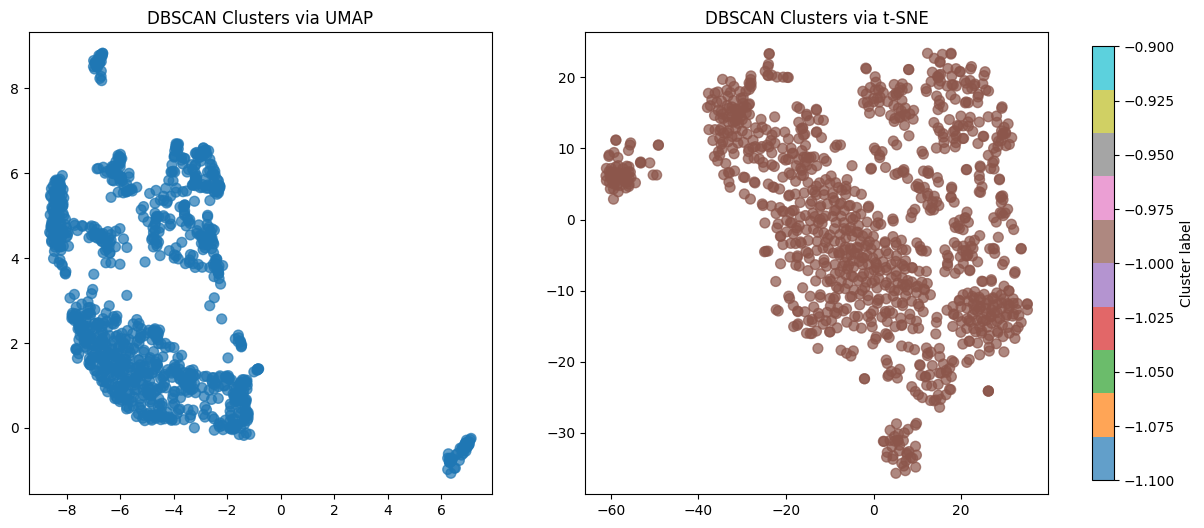

In [ ]:
#@title dbscan, umap tsne, plt
dbscan = DBSCAN(eps=2, min_samples=100)
d_labels = dbscan.fit_predict(df_scaled)

umap_embedding = umap.UMAP(random_state=42).fit_transform(df_scaled)
tsne_embedding = TSNE(random_state=42).fit_transform(df_scaled)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sc_umap = axs[0].scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=d_labels, cmap='tab10', s=50, alpha=0.7)
axs[0].set_title("DBSCAN Clusters via UMAP")
sc_tsne = axs[1].scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=d_labels, cmap='tab10', s=50, alpha=0.7)
axs[1].set_title("DBSCAN Clusters via t-SNE")
cbar = fig.colorbar(sc_tsne, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Cluster label')
plt.show()



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


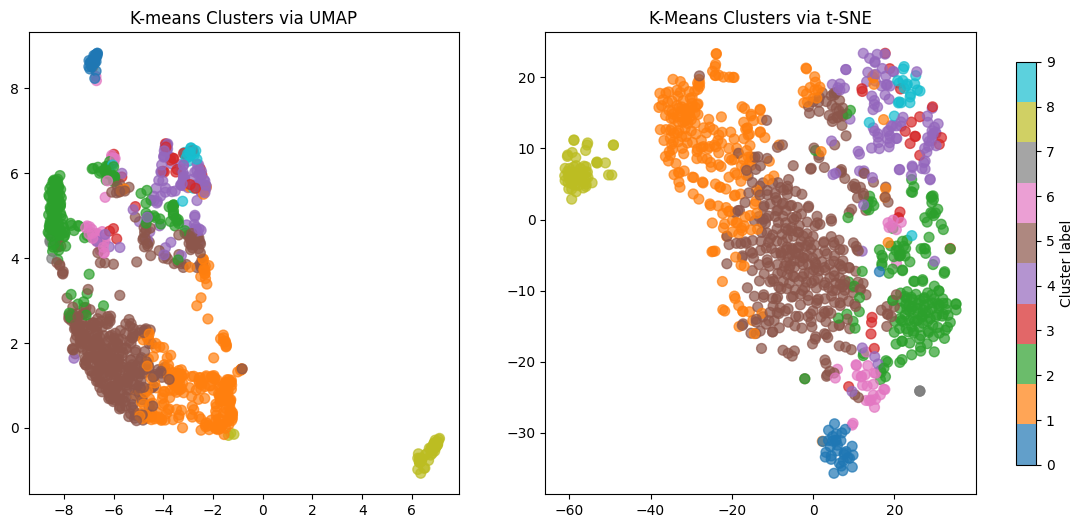

Silhouette Score: 0.0873752669423568
Calinski–Harabasz Score: 65.66003728290912
Davies-Bouldin Score: 2.28439162011174


In [ ]:
#@title kmeans, umap tsne, plt, score(silhoutte_score, davies_bouldin_score, calinski_harabasz_score)
kmeans = KMeans(n_clusters=10, random_state=42)
k_labels = kmeans.fit_predict(df_scaled)

# UMAP, TSNE
umap_embedding = umap.UMAP(random_state=42).fit_transform(df_scaled)
tsne_embedding = TSNE(random_state=42).fit_transform(df_scaled)

# Plot(umap, tsne), score()
fig, axs = plt.subplots(1, 2, figsize=(13, 6))
sc_umap = axs[0].scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=k_labels, cmap='tab10', s=50, alpha=0.7)
axs[0].set_title("K-means Clusters via UMAP")
sc_tsne = axs[1].scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=k_labels, cmap='tab10', s=50, alpha=0.7)
axs[1].set_title("K-Means Clusters via t-SNE")
cbar = fig.colorbar(sc_tsne, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Cluster label')
plt.show()

# score_kMeans
k_score1 = silhouette_score(df_scaled, k_labels)
print("Silhouette Score:", k_score1)
k_score2 = calinski_harabasz_score(df_scaled, k_labels)
print("Calinski–Harabasz Score:", k_score2)
k_score3 = davies_bouldin_score(df_scaled, k_labels)
print("Davies-Bouldin Score:", k_score3)